In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,"C:/Users/Dustin/Desktop/Numerische Methoden/VS Code/NM-Code-for-Excercises")
import shortcuts as s

In [2]:
# #Aufgabe 2

# A = np.asfarray([[1/3,1/12],[1/12,1/2]])
# b = np.asfarray([-0.2,2.1])

# s.lgs_solver(A,b)

In [3]:
#set1
x1data = np.asfarray([1.1, 1.9, 3.2, 4.1, 4.9, 6.3])
y1data = np.asfarray([6.0, 5.1, 3.9, 2.2, 4.0, 6.2])

#set2
x2data = np.asfarray([0.9, 1.8, 3.1, 3.9, 4.8, 6.1])
y2data = np.asfarray([1.0, 5.5, 6.0, 1.4, 0.9, 4.5])

print(np.shape(x1data)[0])


6


In [14]:
def neville_algorithm(x,m,xdata,ydata):
    m += 1
    size = np.shape(xdata)[0]

    loc = 0
    i = 0
    while i < size-1:
        if xdata[i] <= x <= xdata[i+1]:
            loc = i
        i += 1
    
    if x >= xdata[size-1]:
        loc = size - 1
    
    P = np.asfarray([])
    for i in range(size):                               #Erster Iterationsschritt
        P = np.append(P,ydata[i])

    k = 1                                               #k entspricht der Ordnung der Polynome

    while k < m:                                        #Ab hier werden die höheren Polynome bestimmt, angefangen mit linearer Ordnung (k=1)
        i = 0
        P_higher_order = np.zeros(size-k)
        while (i+k) < size:
            P_higher_order[i] = ((x-xdata[i+k])*P[i]+(xdata[i]-x)*P[i+1])/(xdata[i]-xdata[i+k])
            i += 1
        P = P_higher_order
        k += 1
    
    loc = loc - m + 1

    if loc <= 0:
        loc = 0

    return P[loc]

    

In [15]:
s.neville_algorithm(2,1,x1data,y1data)

4.987499999999999

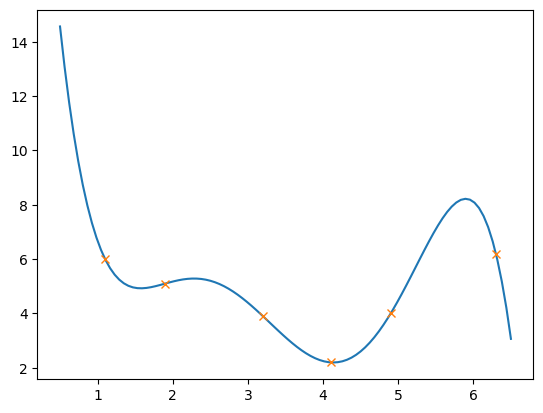

In [24]:
#set1
xrange = np.linspace(0.5,6.5,100)

yrange = np.asfarray([])
for i in xrange:
    yrange = np.append(yrange,s.neville_algorithm(i,5,x1data,y1data))


#print(xrange)
#print(yrange)

plt.plot(xrange,yrange)
plt.plot(x1data,y1data,"x")


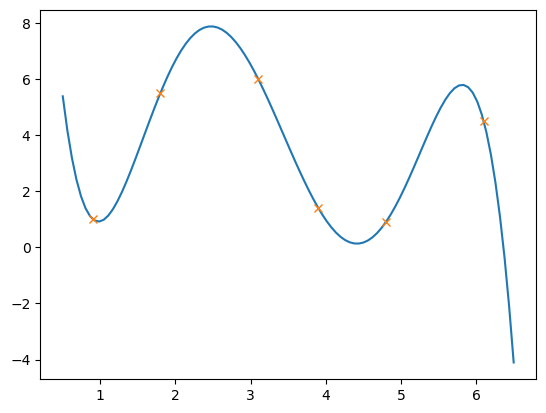

In [28]:
#set2
xrange = np.linspace(0.5,6.5,100)

yrange = np.asfarray([])
for i in xrange:
    yrange = np.append(yrange,s.neville_algorithm(i,5,x2data,y2data))

plt.plot(xrange,yrange)
plt.plot(x2data,y2data,"x")
